In [21]:
import networkx  as nx
import matplotlib.pyplot as plt
import numpy as np

In [5]:
G = nx.Graph()
# G = nx.DiGraph() #directed
# G = nx.MultiGraph() #double edges
# G = nx.MultiDiGraph()

In [10]:
G.add_edge(1,2) #Defines the nodes automatically
G.add_edge(2,3,weight=2)
G.add_node('A')

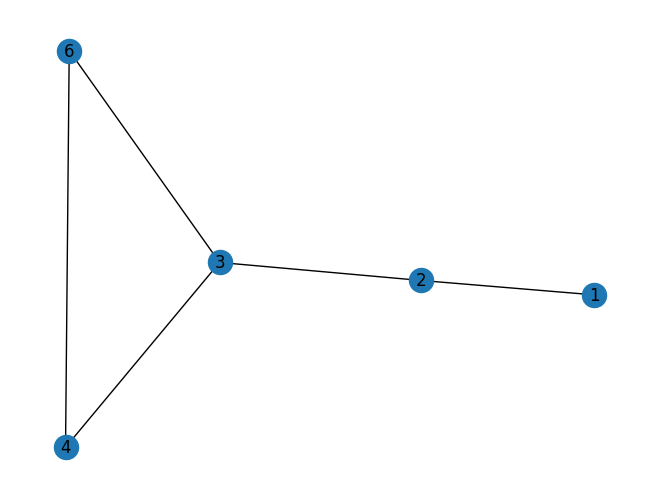

In [20]:
#create from edges
edges = [(1,2), (2,3), (3,4), (4,6), (3,6)]
G=nx.Graph()
G.add_edges_from(edges)
nx.draw_spring(G, with_labels=True)
plt.show()

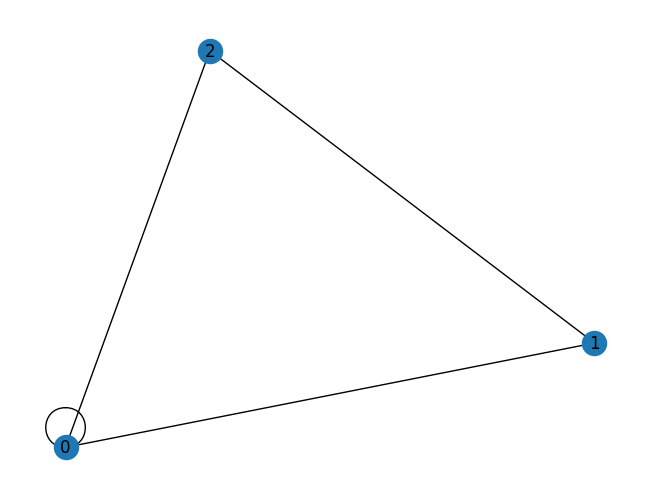

In [23]:
#create from adjascency matrix
adjascency_matrix = np.array([[1,1,1],
                  [0,0,1],
                  [0,1,0]])
G=nx.from_numpy_array(adjascency_matrix)
nx.draw_spring(G, with_labels=True)
plt.show()

In [34]:
G = nx.complete_graph(5) # all nodes are interconnected
dict(G.degree) #get degrees
nx.shortest_path(G,0,1)#get shortest path
nx.degree_centrality(G)# how central is a node to other nodes
nx.density(G)#number or edges available/total number of edges
print(list(nx.bridges(G))) #find number of bridges, edges that whenr emoved increasenumber of
print(list(nx.connected_components(G)))
# print(nx.strongly_connected_components(G))
# print(nx.weakly_connected_components(G))
#connected components

[]
[{0, 1, 2, 3, 4}]


<function matplotlib.pyplot.show(close=None, block=None)>

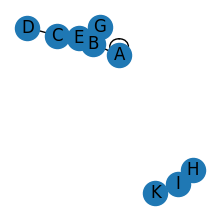

In [56]:
#Djikstra algorithm
#DFS
#BFS
plt.figure(figsize=(5,5))
edges= [("A", "A"), ("A", "B"), ("B", "C"), ("C", "D"), ("C","E"), ("E", "G"), ("B", "E"), ("B", "G"), ("H", "I"), ("I","K")]
G = nx.from_edgelist(edges)
nx.draw_spring(G, with_labels=True)
plt.show


In [52]:
def dfs(Graph, current_node, visited=None):
    if visited==None:
        visited=set()

    visited.add(current_node)

    for neighbor in list(G.neighbors(current_node)):
        if neighbor not in visited:
            dfs(Graph, neighbor, visited)
        
    return visited
dfs(G, "A")

{'A', 'B', 'C', 'D', 'E', 'G'}

In [44]:
list(G.neighbors('A'))

['B']

In [59]:
import networkx as nx
import heapq

# List of edges (unweighted graph)
edges = [("A", "A"), ("A", "B"), ("B", "C"), ("C", "D"), ("C", "E"), ("E", "G"), 
         ("B", "E"), ("B", "G"), ("H", "I"), ("I", "K")]

# Create the graph from the edge list
G = nx.from_edgelist(edges)

# Dijkstra's algorithm for NetworkX graph
def dijkstra_nx(graph, start):
    priority_queue = [(0, start)]  # Priority queue to hold (distance, node)
    distances = {node: float('inf') for node in graph}  # Initialize distances to infinity
    distances[start] = 0  # Distance to the start node is 0
    previous_nodes = {node: None for node in graph}  # To track the path
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)  # Get the node with smallest distance
        
        # Explore neighbors of the current node
        for neighbor in graph.neighbors(current_node):
            distance = current_distance + 1  # Since this is an unweighted graph, we assume all edges have weight 1
            
            # If a shorter path to the neighbor is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the path
                heapq.heappush(priority_queue, (distance, neighbor))  # Add neighbor to the priority queue
    
    return distances, previous_nodes

# Function to reconstruct the shortest path from start to target
def shortest_path_nx(previous_nodes, start, target):
    path = []
    current_node = target
    while current_node is not None:
        path.insert(0, current_node)  # Insert the node at the start of the path list
        current_node = previous_nodes[current_node]  # Move to the previous node
    if path[0] == start:  # Ensure that the path starts from the start node
        return path
    else:
        return []  # No path found

# Example usage
start_node = 'A'
target_node = 'G'

# Run Dijkstra's algorithm
distances, previous_nodes = dijkstra_nx(G, start_node)

# Output the shortest distances from start node to all other nodes
print("Shortest distances from node", start_node, ":", distances)

# Output the shortest path from start node to the target node
path = shortest_path_nx(previous_nodes, start_node, target_node)
print(f"Shortest path from {start_node} to {target_node}:", path)


ValueError: not enough values to unpack (expected 2, got 1)